# Car Insurance Claim Prediction

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
sb.set()

In [3]:
o_data = pd.read_csv('train.csv')
o_data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
print("Data Dims: ", o_data.shape)

Data Dims:  (58592, 44)


In [5]:
print(o_data.dtypes)

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [6]:
#Check for presence of null values in the dataset
print("Number of null values in each column: ")
print(o_data.isnull().sum())

Number of null values in each column: 
policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_rad

Since there are no null values within the dataset, there are no columns that need to be removed due to invalid data.

In [7]:
#Check for duplicate rows 
print("Number of rows that are duplicates: ")
print(o_data.duplicated().sum())

Number of rows that are duplicates: 
0


Since the number of duplicates = 0, we can conclude that each set of data within the dataset is unique.

In [8]:
#Finding the ratio of claims vs no claims
class_freq = o_data['is_claim'].value_counts()
print(class_freq)

is_claim
0    54844
1     3748
Name: count, dtype: int64


In [9]:
class_ratio = class_freq[0]/class_freq[1]
print("Ratio of Class 0 to Class 1: {:.2f}".format(class_ratio))

Ratio of Class 0 to Class 1: 14.63


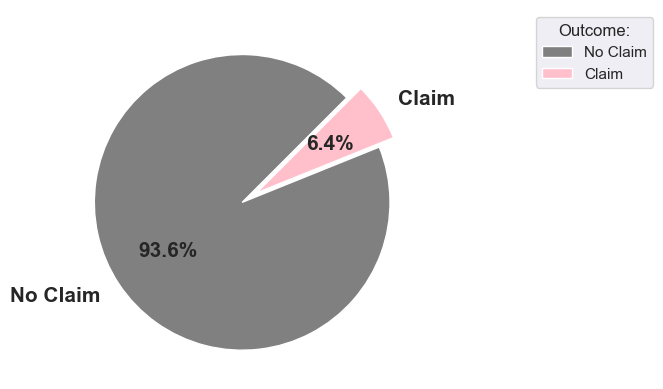

In [10]:
fig = plt.figure(facecolor ='white')
ax = fig.add_subplot(1,1,1, facecolor = 'white')
plt.pie((class_freq), labels=['No Claim', 'Claim'], radius = 1, colors = ['gray', 'pink'], autopct = '%1.1f%%', explode = [0.1, 0.015], labeldistance = 1.15, startangle = 45, textprops={'fontsize':15, 'fontweight': 'bold'})
plt.legend(title='Outcome:', loc='upper right', bbox_to_anchor=(1.6,1))
fig.patch.set_facecolor('white')
plt.show()

Due to the large class imbalance in the response variable 'is_claim', we need to fix this to prevent further problems for classification models. 

In [11]:
no_claim = o_data.drop(o_data[o_data['is_claim']==1].index)
claim = o_data.drop(o_data[o_data['is_claim']==0].index)

In [12]:
from sklearn.utils import resample
no_claim_downsample = resample(no_claim, replace = True, n_samples=len(claim), random_state =42)
print(no_claim_downsample.shape)

(3748, 44)


is_claim
0    3748
1    3748
Name: count, dtype: int64


<Axes: ylabel='Outcome'>

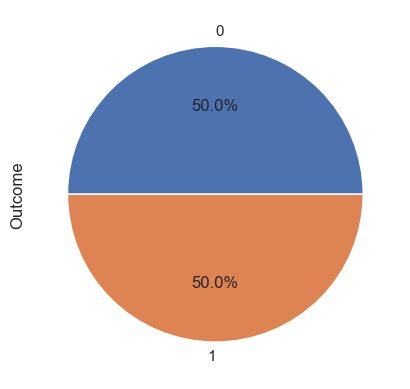

In [13]:
data = pd.concat([no_claim_downsample, claim])
print(data["is_claim"].value_counts())
data.groupby('is_claim').size().plot(kind = 'pie', y = 'is_claim', label = 'Outcome', autopct = '%1.1f%%')


# Analysis of Numeric Variables

In this segment, we will be investigating whether there are any relationships between the numeric variables and "is_claim".

In [14]:
numeric_data = data.select_dtypes(include = ['number'])

In [15]:
numeric_data.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
16895,1.135573,0.18,0.567308,7788,4,2,1497,4,5,5.0,3990,1755,1523,1490,5,0
923,0.698607,0.01,0.625000,34738,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
40775,1.146050,0.05,0.653846,5410,1,2,1197,4,5,4.8,3845,1735,1530,1335,2,0
58062,0.157209,0.14,0.471154,8794,3,6,1493,4,6,5.2,4300,1790,1635,1720,3,0
47801,0.707283,0.02,0.721154,34738,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0


In [16]:
numeric_data = numeric_data.drop(['ncap_rating','make', 'policy_tenure', 'gear_box'], axis =1)
numeric_data.describe().round(2)

,age_of_car,age_of_policyholder,population_density,airbags,displacement,cylinder,turning_radius,length,width,height,gross_weight,is_claim
count,7496.00,7496.00,7496.00,7496.00,7496.00,7496.00,7496.00,7496.00,7496.00,7496.00,7496.00,7496.0
mean,0.07,0.48,18373.51,3.13,1163.44,3.64,4.85,3850.30,1673.23,1552.09,1384.19,0.5
std,0.06,0.12,17083.59,1.83,265.64,0.48,0.23,309.78,111.69,78.75,210.62,0.5
min,0.00,0.29,290.00,1.00,796.00,3.00,4.50,3445.00,1475.00,1475.00,1051.00,0.0
25%,0.02,0.38,6112.00,2.00,796.00,3.00,4.60,3445.00,1515.00,1475.00,1185.00,0.0
50%,0.06,0.46,8794.00,2.00,1197.00,4.00,4.80,3845.00,1735.00,1530.00,1335.00,0.5
75%,0.11,0.55,27003.00,6.00,1493.00,4.00,5.00,3995.00,1755.00,1635.00,1510.00,1.0
max,0.49,0.95,73430.00,6.00,1498.00,4.00,5.20,4300.00,1811.00,1825.00,1720.00,1.0


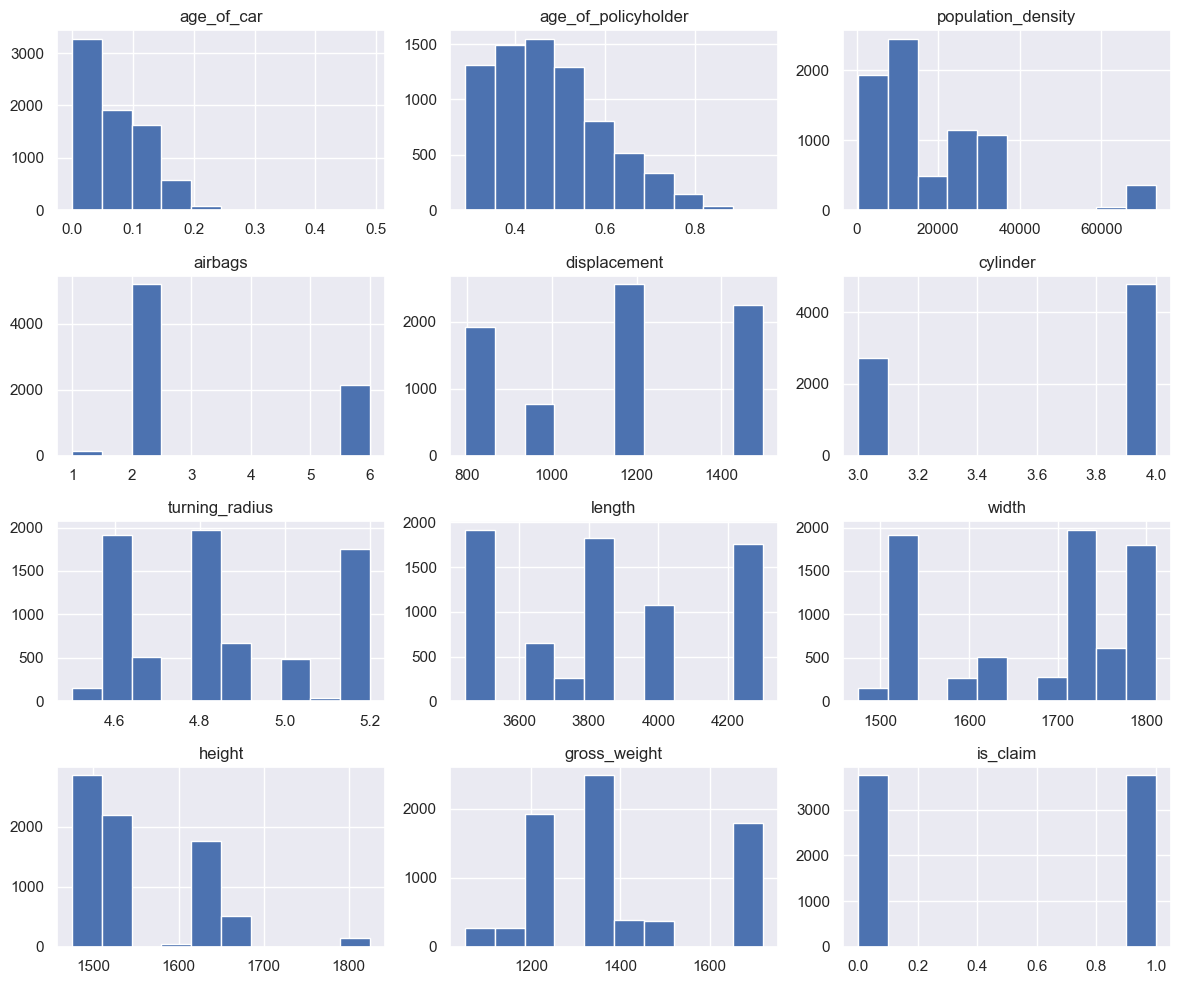

In [17]:
numeric_data.hist(figsize = (12,10))
plt.tight_layout()
plt.show()

The histograms generated are useful in helping us make a few observations: 

1) Majority of car owners buy insurance upon purchasing their cars 
2) Most policy holders are around 40-50 years of age. 

In [18]:
ndata_no_claim = numeric_data.drop(numeric_data[numeric_data['is_claim']==1].index)
ndata_no_claim.describe().round(2)

,age_of_car,age_of_policyholder,population_density,airbags,displacement,cylinder,turning_radius,length,width,height,gross_weight,is_claim
count,3748.00,3748.00,3748.00,3748.00,3748.00,3748.00,3748.00,3748.00,3748.00,3748.00,3748.00,3748.0
mean,0.07,0.47,19123.19,3.10,1156.69,3.62,4.85,3842.38,1669.97,1551.46,1379.93,0.0
std,0.06,0.12,17957.47,1.81,267.19,0.49,0.23,310.68,112.53,79.38,210.62,0.0
min,0.00,0.29,290.00,1.00,796.00,3.00,4.50,3445.00,1475.00,1475.00,1051.00,0.0
25%,0.02,0.38,6112.00,2.00,796.00,3.00,4.60,3445.00,1515.00,1475.00,1185.00,0.0
50%,0.06,0.45,8794.00,2.00,1197.00,4.00,4.80,3845.00,1735.00,1530.00,1335.00,0.0
75%,0.11,0.55,27003.00,6.00,1493.00,4.00,5.00,3995.00,1755.00,1635.00,1510.00,0.0
max,0.49,0.95,73430.00,6.00,1498.00,4.00,5.20,4300.00,1811.00,1825.00,1720.00,0.0


In [19]:
ndata_claim = numeric_data.drop(numeric_data[numeric_data['is_claim']==0].index)
ndata_claim.describe().round(2)

,age_of_car,age_of_policyholder,population_density,airbags,displacement,cylinder,turning_radius,length,width,height,gross_weight,is_claim
count,3748.00,3748.00,3748.00,3748.00,3748.00,3748.00,3748.00,3748.00,3748.00,3748.00,3748.00,3748.0
mean,0.06,0.48,17623.82,3.16,1170.18,3.65,4.86,3858.21,1676.50,1552.72,1388.44,1.0
std,0.05,0.13,16130.13,1.84,263.94,0.48,0.23,308.72,110.77,78.12,210.56,0.0
min,0.00,0.29,290.00,1.00,796.00,3.00,4.50,3445.00,1475.00,1475.00,1051.00,1.0
25%,0.02,0.38,6112.00,2.00,998.00,3.00,4.60,3655.00,1515.00,1490.00,1185.00,1.0
50%,0.05,0.46,8794.00,2.00,1197.00,4.00,4.80,3845.00,1735.00,1530.00,1335.00,1.0
75%,0.10,0.56,27003.00,6.00,1493.00,4.00,5.00,3995.00,1755.00,1635.00,1510.00,1.0
max,0.35,0.95,73430.00,6.00,1498.00,4.00,5.20,4300.00,1811.00,1825.00,1720.00,1.0


There does not seem to be a relationship between the numeric variables and the likelihood of claiming car insurance. The average of the numeric variables across the 2 datasets (ndata_claim and ndata_no_claim) seem to be similar.

# Analysis of Categorical Variables

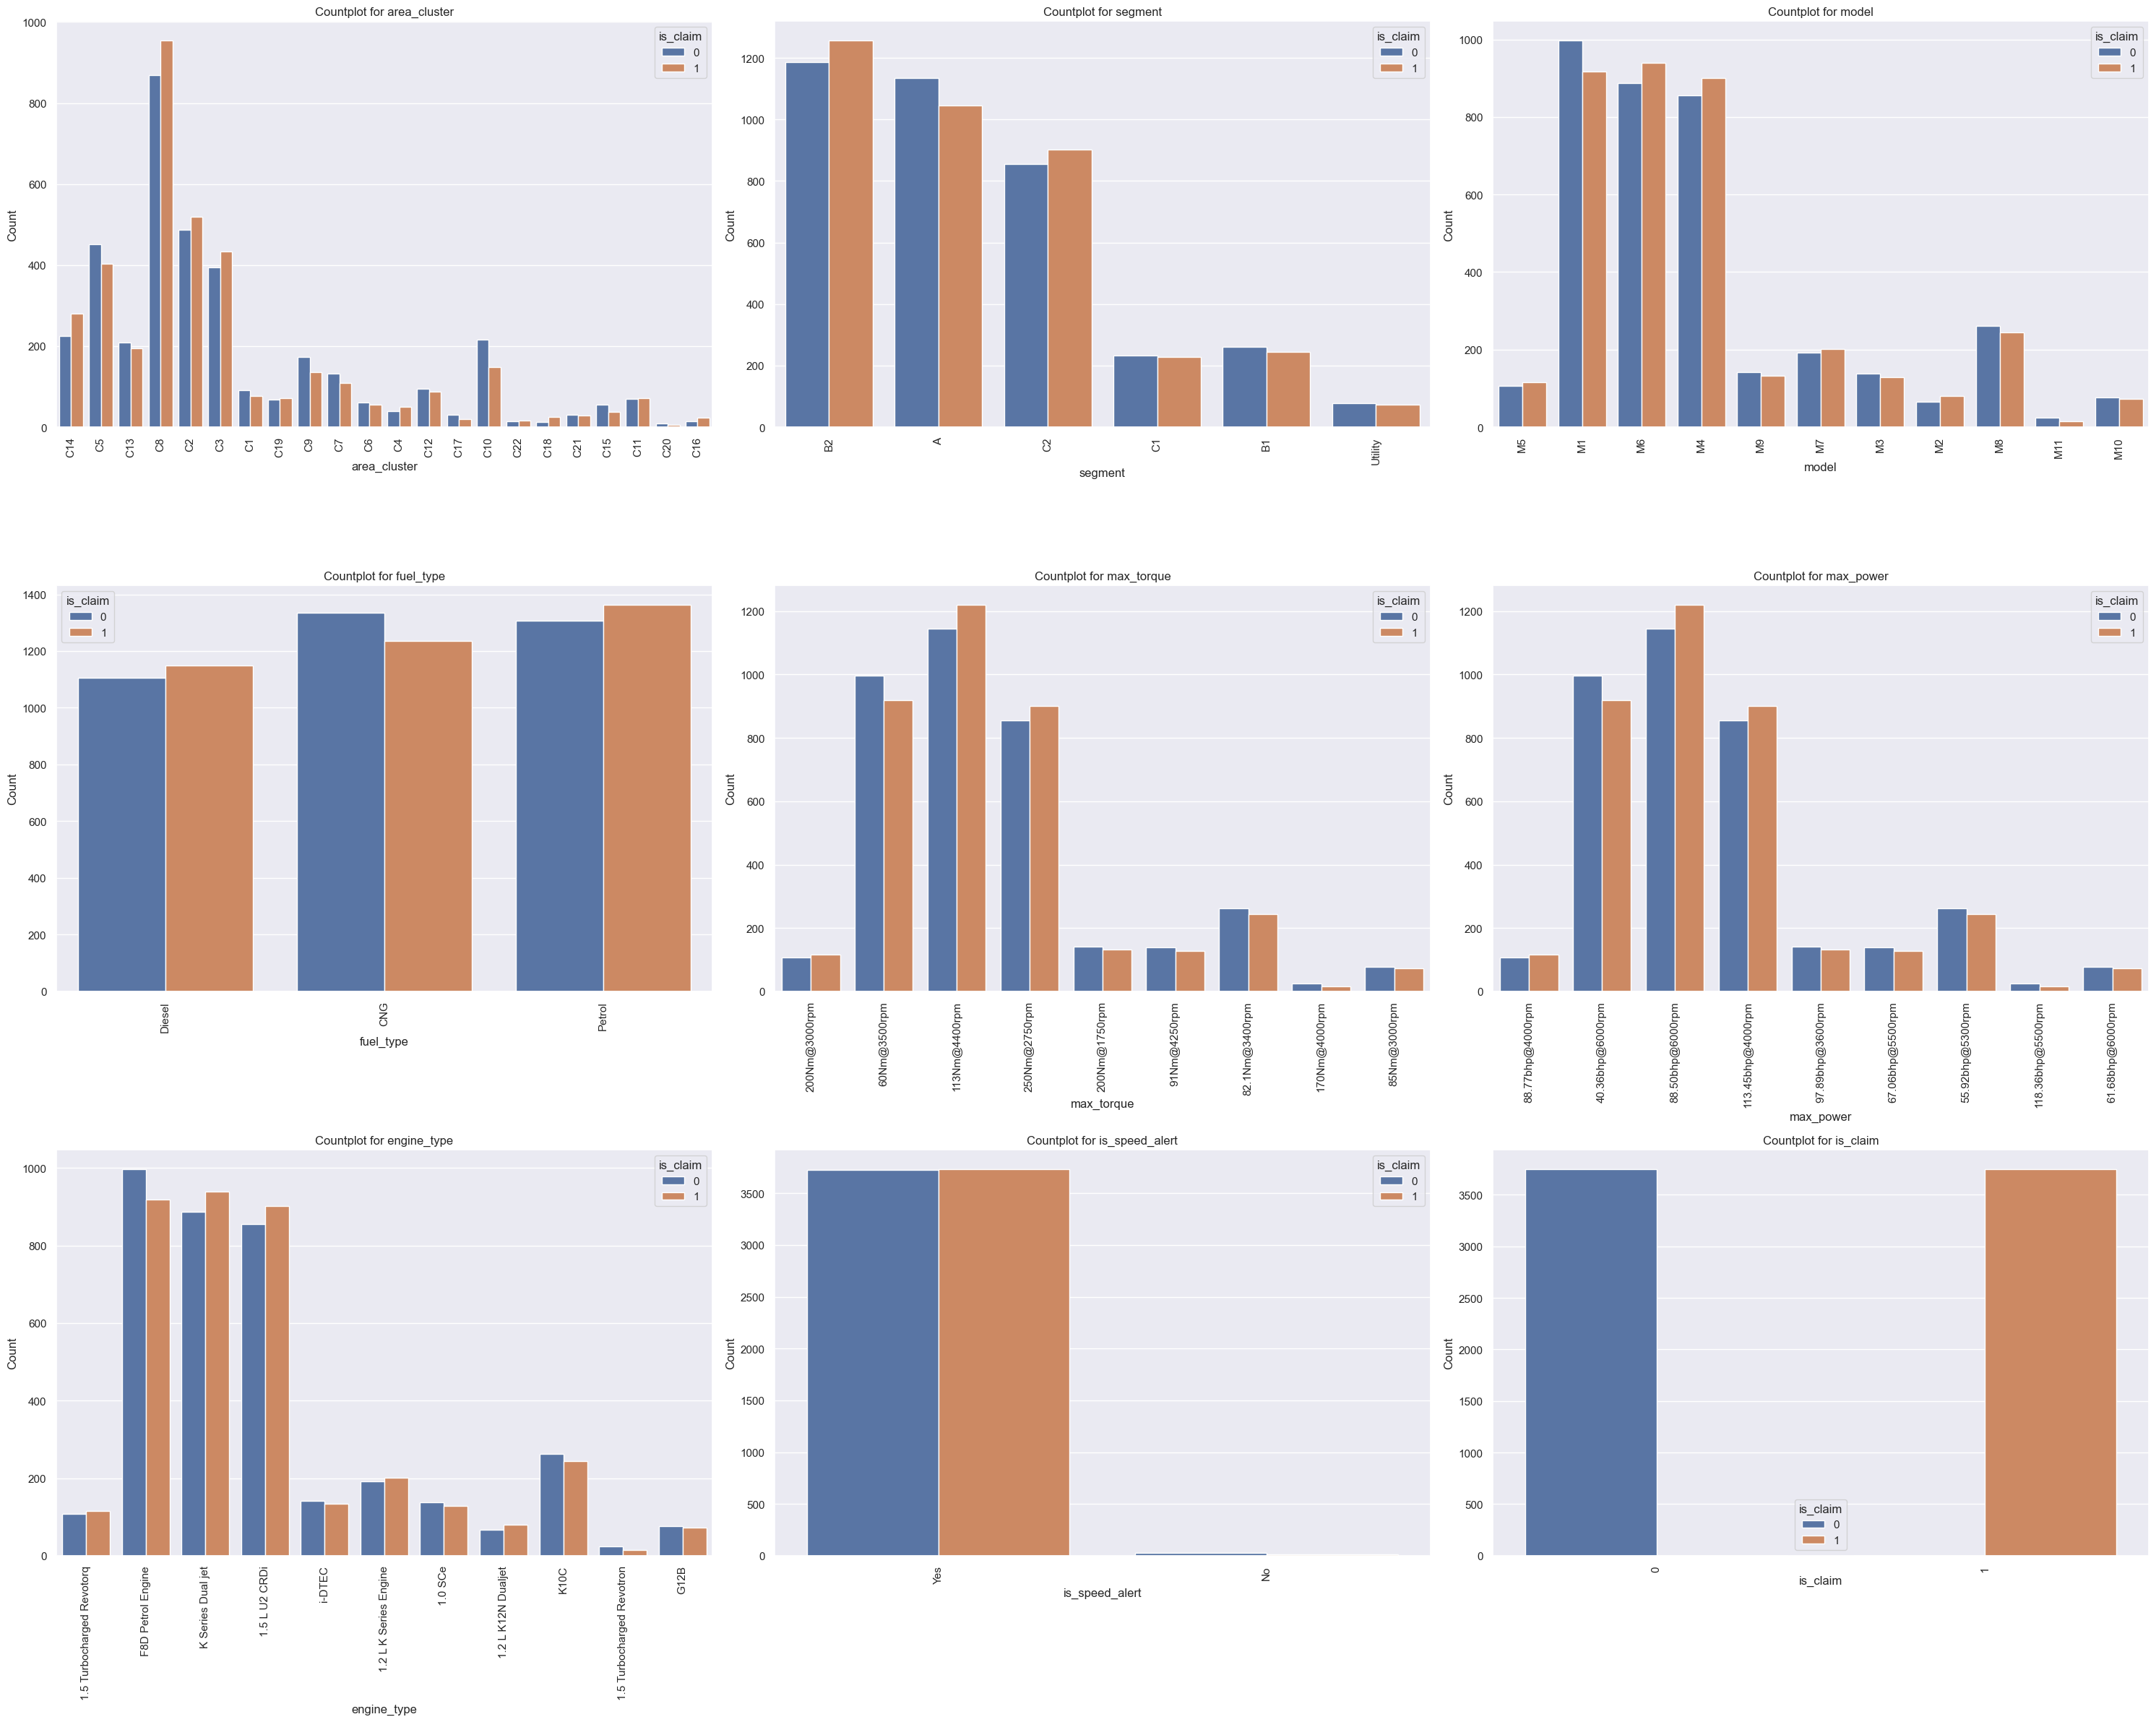

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(30, 24))
axes = axes.flatten()

cat_var=['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque','max_power', 'engine_type', 'is_speed_alert','is_claim']

for i in range(len(cat_var)):
    column = cat_var[i]
    ax = axes[i]  # Select the current subplot

    # Plot the countplot
    sns.countplot(data=data, x=column, ax=ax, hue='is_claim')
    ax.set_title(f'Countplot for {column}')
    
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels if need
    
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

We can make a few observations from the categorical variables:

1) From the top left plot, we can infer that the greatest number of claims (about 1000) comes from area c8. 
2) From the top right plot, we can infer that owners of car models M1, M4 and M6 have the highest number of claims (about 1000 each). 
3) There are zero claims where the car does not possess a speed alert system.

In [21]:
cat_data = data[['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque','max_power', 'engine_type', 'is_speed_alert','is_claim']]

<Axes: xlabel='area_cluster', ylabel='is_claim'>

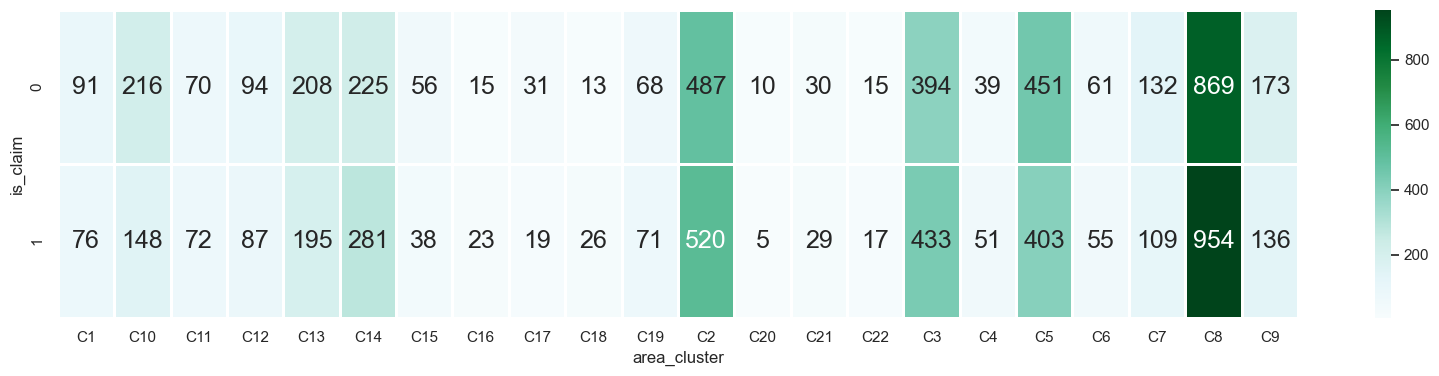

In [22]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'area_cluster']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='segment', ylabel='is_claim'>

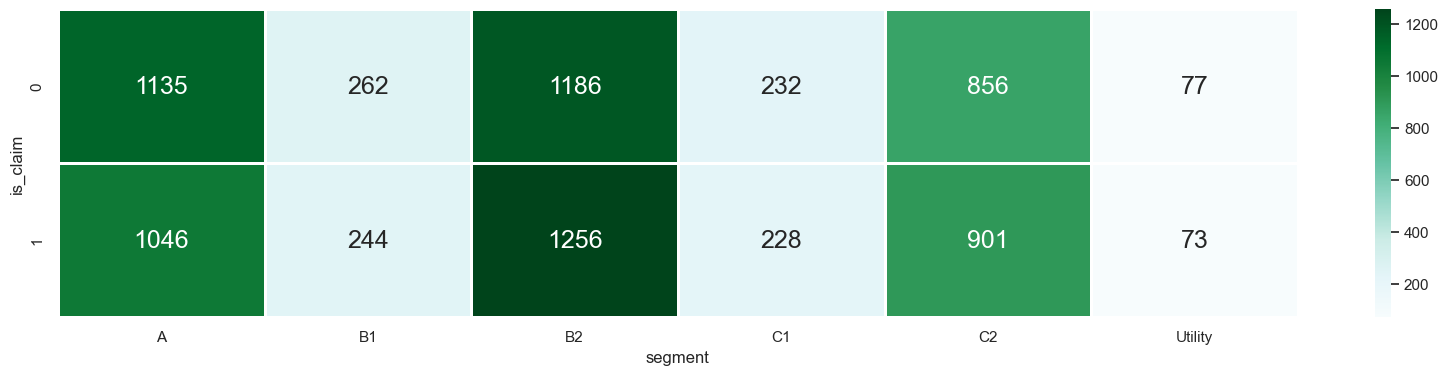

In [23]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'segment']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='model', ylabel='is_claim'>

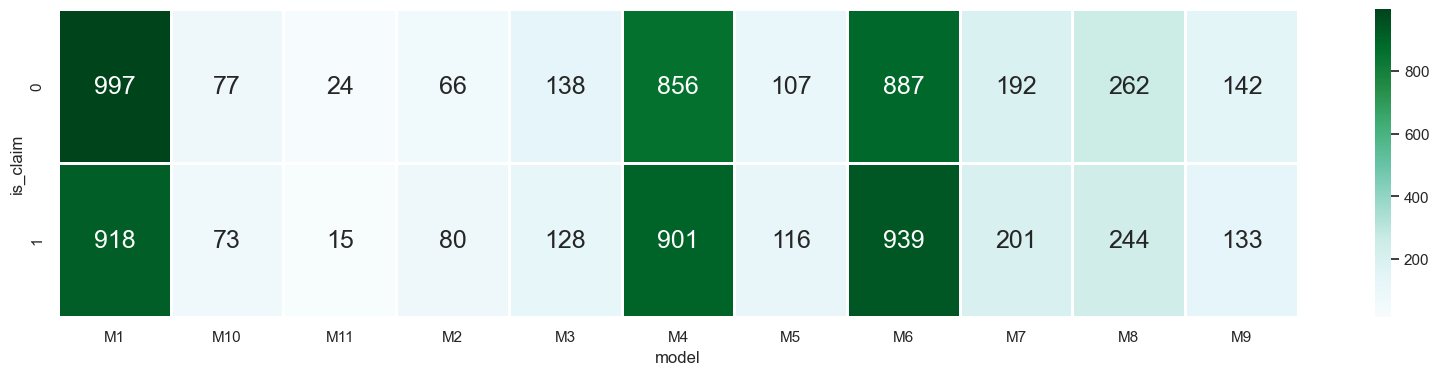

In [24]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'model']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='fuel_type', ylabel='is_claim'>

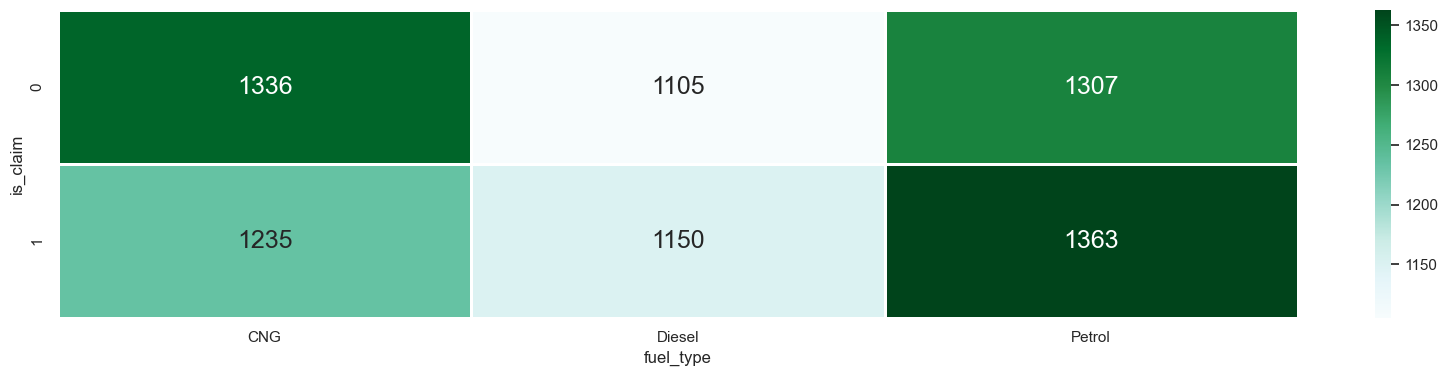

In [25]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'fuel_type']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='max_torque', ylabel='is_claim'>

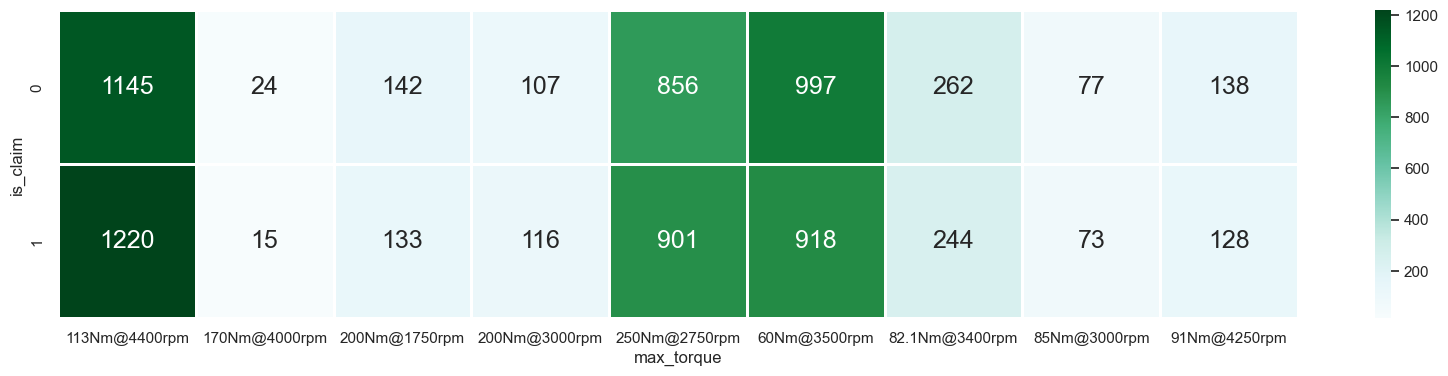

In [26]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'max_torque']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='max_power', ylabel='is_claim'>

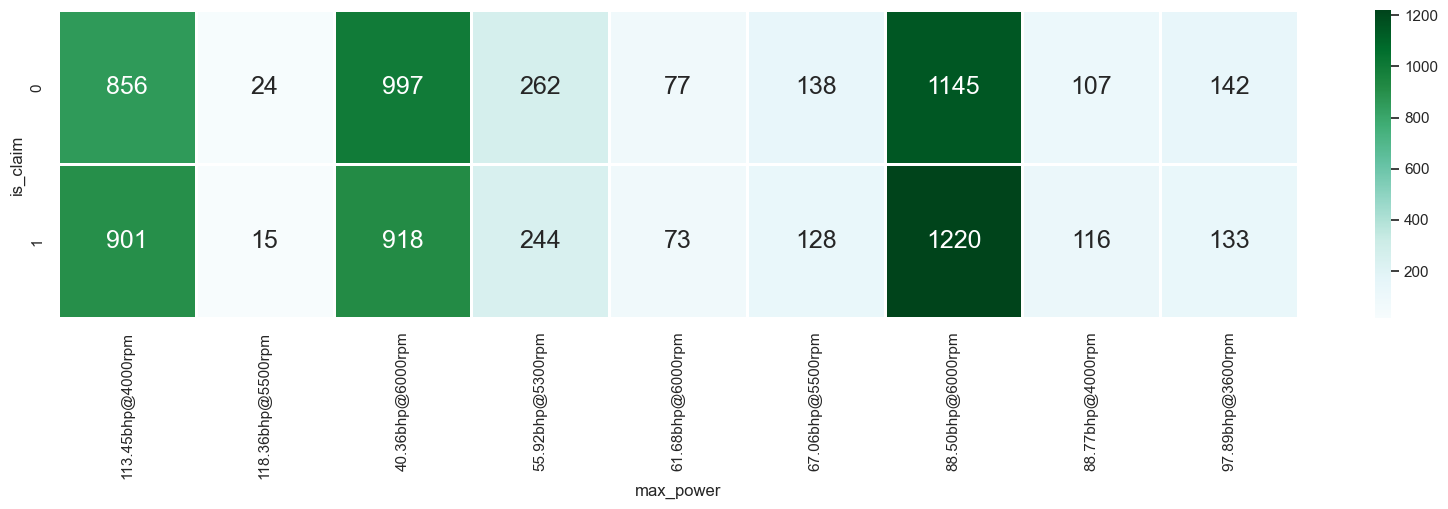

In [27]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'max_power']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='engine_type', ylabel='is_claim'>

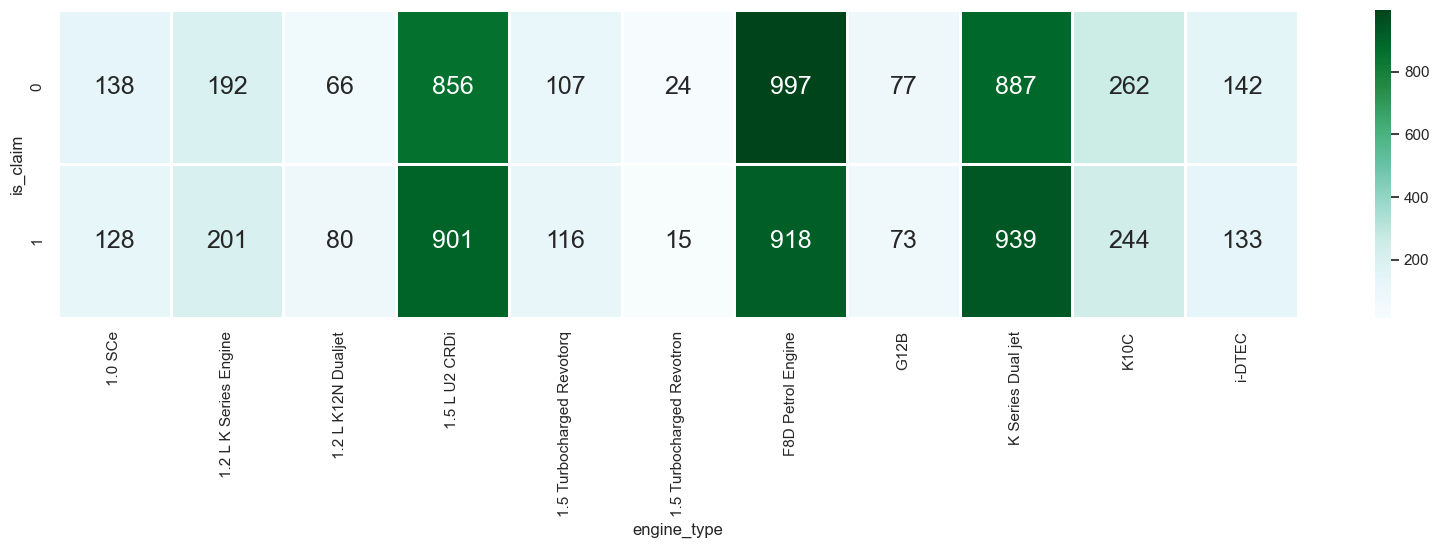

In [28]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'engine_type']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='is_speed_alert', ylabel='is_claim'>

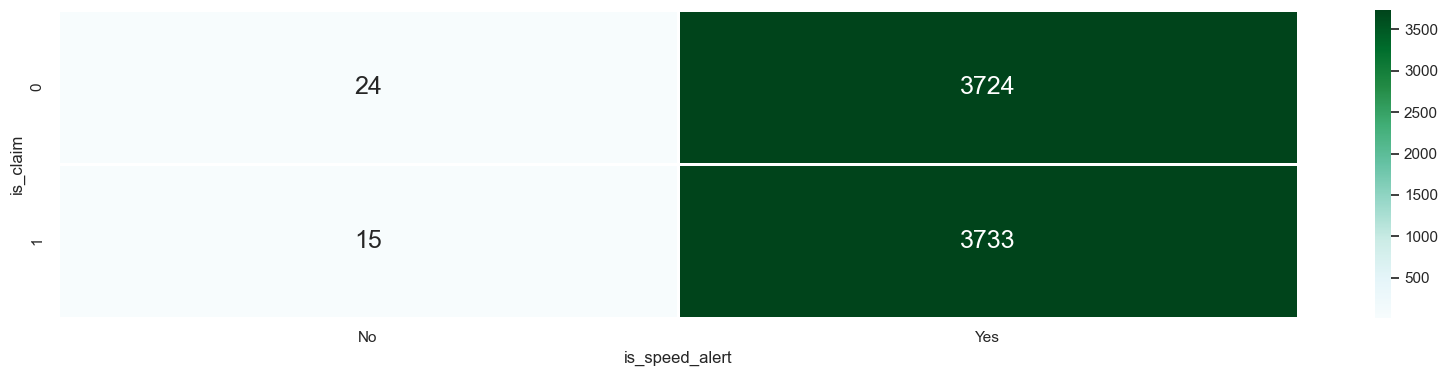

In [29]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'is_speed_alert']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [29]:
#test